## ASDS 5302 - PRINCIPLES OF DATA SCIENCE

## FINAL PROJECT - TEAM 1

## Hariharan Selvam (1002174644)
## Keshavi Mangalapally (1002165375)

## Topic: Salary Prediction
## Problem statement:
Build an ML model to predict salary through the average salary with the help of other 
features.

## Dataset:
=> This dataset is taken from Kaggle data library.

=> This is the data from the year 2018 from the Glassdoor job portal.

=> This dataset includes only the data science related jobs, their locations, job description and many other aspects

## Importing libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , r2_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor
import warnings
warnings.filterwarnings('ignore')


## Information about the dataset

In [126]:
df_salary = pd.read_csv("C:/Users/harih/Downloads/salary_data.csv")
df_salary.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [127]:
df_salary.shape

(742, 28)

In [128]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [129]:
df_salary.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [130]:
df_salary.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
dtype: object

## DATA PREPROCESSING

In [131]:
df_salary_new = df_salary.copy()
df_salary_new.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


## 1. Dropping unneccessary columns

In [132]:
unnecessary_columns = ['Sector', 'Location','age','hourly', 'same_state', 'company_txt','Competitors',
                       'Founded','employer_provided','Headquarters']
df_salary_new = df_salary.drop(unnecessary_columns, axis=1, errors='ignore')


In [133]:
df_salary_new.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Size,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_state,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,NM,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,MD,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,501 to 1000 employees,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,FL,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,1001 to 5000 employees,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,WA,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,NY,1,0,0,0,1


## 2.Checking for missing values

In [134]:
df_salary_new.dropna()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Size,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_state,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,NM,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,MD,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,501 to 1000 employees,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,FL,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,1001 to 5000 employees,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,WA,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,NY,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),58,111,84.5,MA,0,0,0,1,0
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,1001 to 5000 employees,Company - Public,Internet,$100 to $500 million (USD),72,133,102.5,TN,1,0,1,1,0
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,501 to 1000 employees,College / University,Colleges & Universities,Unknown / Non-Applicable,56,91,73.5,PA,0,0,0,0,1
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2",1 to 50 employees,Company - Private,Staffing & Outsourcing,$5 to $10 million (USD),95,160,127.5,PA,0,0,0,0,1


## 3. Finding Duplicated values and removing it

In [135]:
df_salary_new[df_salary_new.duplicated()] #Finds Duplicated data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Size,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_state,python_yn,R_yn,spark,aws,excel
29,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,501 to 1000 employees,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,FL,1,0,1,0,1
30,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,1001 to 5000 employees,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,WA,1,0,0,0,0
58,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,501 to 1000 employees,Company - Private,Banks & Credit Unions,Unknown / Non-Applicable,54,93,73.5,MD,0,0,0,0,1
59,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,201 to 500 employees,Company - Public,Real Estate,$1 to $2 billion (USD),71,119,95.0,TX,1,0,0,1,1
86,Staff Data Scientist - Technology,$106K-$172K (Glassdoor est.),Position Summary...\nDrives the execution of m...,3.2,Walmart\n3.2,10000+ employees,Company - Public,"Department, Clothing, & Shoe Stores",$10+ billion (USD),106,172,139.0,TX,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),58,111,84.5,MA,0,0,0,1,0
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,1001 to 5000 employees,Company - Public,Internet,$100 to $500 million (USD),72,133,102.5,TN,1,0,1,1,0
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,501 to 1000 employees,College / University,Colleges & Universities,Unknown / Non-Applicable,56,91,73.5,PA,0,0,0,0,1
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2",1 to 50 employees,Company - Private,Staffing & Outsourcing,$5 to $10 million (USD),95,160,127.5,PA,0,0,0,0,1


In [136]:
df_salary_new.drop_duplicates(keep='first')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Size,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_state,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,NM,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,MD,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,501 to 1000 employees,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,FL,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,1001 to 5000 employees,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,WA,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,NY,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Data Architect / Data Modeler,$63K-$110K (Glassdoor est.),Medidata: Conquering Diseases Together\n\nMedi...,4.3,Medidata Solutions\n4.3,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,$500 million to $1 billion (USD),63,110,86.5,NY,0,0,0,1,1
700,Data Scientist,$65K-$113K (Glassdoor est.),DatamanUSA has an exciting opportunity for a D...,3.4,"DatamanUSA, LLC\n3.4",51 to 200 employees,Company - Private,IT Services,$5 to $10 million (USD),65,113,89.0,WA,0,0,0,0,0
716,"Associate Scientist / Sr. Associate Scientist,...",$59K-$125K (Glassdoor est.),"Who we are\n\n23andMe, the leading consumer ge...",4.0,23andMe\n4.0,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,Unknown / Non-Applicable,59,125,92.0,CA,0,0,0,1,1
732,Machine Learning Engineer (NLP),$80K-$142K (Glassdoor est.),CK-12’s mission is to provide free access to o...,4.1,CK-12 Foundation\n4.1,1 to 50 employees,Company - Private,K-12 Education,Unknown / Non-Applicable,80,142,111.0,CA,1,0,0,1,1


## 4. Unique values of features and target

In [137]:
df_salary_new.nunique()

Job Title            264
Salary Estimate      416
Job Description      463
Rating                31
Company Name         343
Size                   9
Type of ownership     11
Industry              60
Revenue               14
min_salary           119
max_salary           163
avg_salary           225
job_state             38
python_yn              2
R_yn                   2
spark                  2
aws                    2
excel                  2
dtype: int64

In [138]:
print("Job Title:")
print(df_salary_new['Job Title'].value_counts())
print("-----------------------------------------------------------------------------------------")

print("Salary Estimate:")
print(df_salary_new['Salary Estimate'].value_counts())
print("------------------------------------------------------------------------------------------")

print("Rating:")
print(df_salary_new['Rating'].value_counts())
print("------------------------------------------------------------------------------------------")

print("Company name:")
print(df_salary_new['Company Name'].value_counts())
print("------------------------------------------------------------------------------------------")

print("size:")
print(df_salary_new['Size'].value_counts())
print("------------------------------------------------------------------------------------------")

print("Type of ownership:")
print(df_salary_new['Type of ownership'].value_counts())
print("-----------------------------------------------------------------------------------------")

print("Industry:")
print(df_salary_new['Industry'].value_counts())
print("-----------------------------------------------------------------------------------------")

print("Revenue:")
print(df_salary_new['Revenue'].value_counts())
print("------------------------------------------------------------------------------------------")

print("minimum salary:")
print(df_salary_new['min_salary'].value_counts())
print("-----------------------------------------------------------------------------------------")

print("maximum salary:")
print(df_salary_new['max_salary'].value_counts())
print("-----------------------------------------------------------------------------------------")

print("Average salary:")
print(df_salary_new['avg_salary'].value_counts())
print("-----------------------------------------------------------------------------------------")

print("Job state:")
print(df_salary_new['job_state'].value_counts())
print("-----------------------------------------------------------------------------------------")

print("Python:")
print(df_salary_new['python_yn'].value_counts())
print("-----------------------------------------------------------------------------------------")

print("R:")
print(df_salary_new['R_yn'].value_counts())
print("----------------------------------------------------------------------------------------")

print("spark:")
print(df_salary_new['spark'].value_counts())
print("---------------------------------------------------------------------------------------")

print("aws:")
print(df_salary_new['aws'].value_counts())
print("----------------------------------------------------------------------------------------")

print("excel:")
print(df_salary_new['excel'].value_counts())




Job Title:
Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64
-----------------------------------------------------------------------------------------
Salary Estimate:
$49K-$113K (Glassdoor est.)         6
$86K-$143K (Glassdoor est.)         6
$54K-$115K (Glassdoor est.)         6
$21-$34 Per Hour(Glassdoor est.)    6
$74K-$124K (Glassdoor est.)         5
                                   ..
$74K-$119K (Glassdoor est.)         1
$55K-$97K (Glassdoor est.)          1
$15K-$16K(Employer est.)            1
$61K-$106K (Glassdoor est.)         1
$62K-$113K (Glassdoor est.)   

## Information about unknown values
revenue => -1, unknown/Non-Applicable

industry => -1

Type of ownership => -1, unknown

size => unknown, -1

Rating => -1.0

In [139]:
remove_val = ['unknown','Unknown' 'Non-Applicable', -1, -1.0]
columns = ['Revenue', 'Industry', 'Type of ownership', 'Size', 'Rating']
df_salary_new[columns] = df_salary_new[columns].replace(remove_val, np.nan)
df_salary_new.dropna()



,Job Title,Salary Estimate,Job Description,Rating,Company Name,Size,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_state,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,NM,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,MD,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,501 to 1000 employees,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,FL,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,1001 to 5000 employees,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,WA,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,NY,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),58,111,84.5,MA,0,0,0,1,0
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,1001 to 5000 employees,Company - Public,Internet,$100 to $500 million (USD),72,133,102.5,TN,1,0,1,1,0
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,501 to 1000 employees,College / University,Colleges & Universities,Unknown / Non-Applicable,56,91,73.5,PA,0,0,0,0,1
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2",1 to 50 employees,Company - Private,Staffing & Outsourcing,$5 to $10 million (USD),95,160,127.5,PA,0,0,0,0,1


In [140]:
df_salary_new.isnull().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating               11
Company Name          0
Size                  0
Type of ownership     0
Industry              0
Revenue               0
min_salary            0
max_salary            0
avg_salary            0
job_state             0
python_yn             0
R_yn                  0
spark                 0
aws                   0
excel                 0
dtype: int64

In [141]:
df_salary_new = df_salary_new.dropna()
df_salary_new.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Size                 0
Type of ownership    0
Industry             0
Revenue              0
min_salary           0
max_salary           0
avg_salary           0
job_state            0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
dtype: int64

## DESCRIPTIVE DATA ANALYSIS

In [142]:
df_salary_new.shape

(731, 18)

In [143]:
df_salary_new.describe()

,Rating,min_salary,max_salary,avg_salary,python_yn,R_yn,spark,aws,excel
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,3.688372,73.396717,126.785226,100.090971,0.530780,0.002736,0.228454,0.238030,0.521204
std,0.570353,31.252418,46.784544,38.537585,0.499393,0.052271,0.420124,0.426169,0.499892
min,1.900000,10.000000,16.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,52.000000,96.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,69.000000,124.000000,96.500000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,90.000000,155.000000,122.500000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,202.000000,306.000000,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Outlier detection and removal

In [144]:


columns = [ 'Rating', 'min_salary', 'max_salary', 'avg_salary','python_yn','R_yn','spark','aws','excel']

def remove_outliers(columns):
    Q1 = df_salary_new[columns].quantile(0.25)
    Q3 = df_salary_new[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df_salary_new[columns] < lower_bound) | (df_salary_new[columns] > upper_bound)
    df_salary_new[columns] = df_salary_new[columns][~outliers]

for column in columns:
    remove_outliers(column)



 Boxplot to check whether the outliers are removed or not

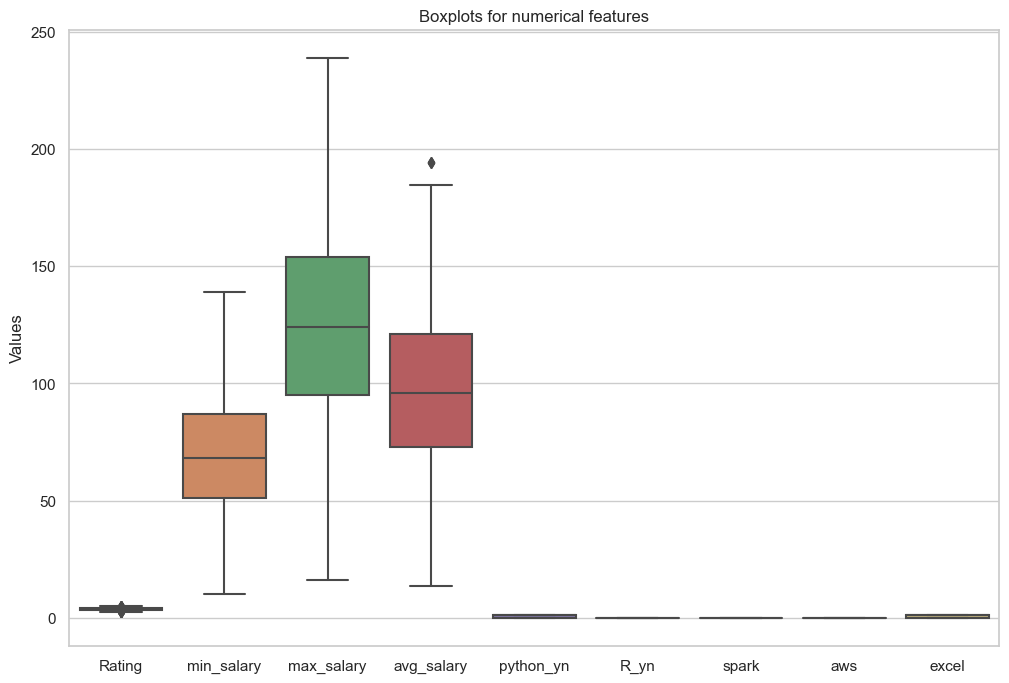

In [145]:
sns.set(style='whitegrid')
fig,ax= plt.subplots(figsize=(12,8))
sns.boxplot(data = df_salary_new[columns], ax=ax)
ax.set_ylabel("Values")
ax.set_title("Boxplots for numerical features")
plt.show()

checking for missing values

In [146]:
df_salary_new.isnull().sum()

Job Title              0
Salary Estimate        0
Job Description        0
Rating                10
Company Name           0
Size                   0
Type of ownership      0
Industry               0
Revenue                0
min_salary            18
max_salary             6
avg_salary             9
job_state              0
python_yn              0
R_yn                   2
spark                167
aws                  174
excel                  0
dtype: int64

We found some missing values here.

In [147]:
df_salary_new = df_salary_new.dropna()

In [148]:
df_salary_new.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Size                 0
Type of ownership    0
Industry             0
Revenue              0
min_salary           0
max_salary           0
avg_salary           0
job_state            0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
dtype: int64

All those missing values were removed.

In [149]:
df_salary_new.shape

(447, 18)

The shape of the updated dataset is 447 rows and 18 columns.

In [150]:
df_salary_new.describe()

,Rating,min_salary,max_salary,avg_salary,python_yn,R_yn,spark,aws,excel
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.0,447.0,447.0,447.000000
mean,3.624161,66.129754,116.923937,91.526846,0.389262,0.0,0.0,0.0,0.534676
std,0.561347,26.829409,43.634217,34.869172,0.488129,0.0,0.0,0.0,0.499355
min,2.300000,10.000000,16.000000,13.500000,0.000000,0.0,0.0,0.0,0.000000
25%,3.300000,45.000000,86.000000,66.250000,0.000000,0.0,0.0,0.0,0.000000
50%,3.700000,62.000000,113.000000,87.000000,0.000000,0.0,0.0,0.0,1.000000
75%,3.900000,84.000000,143.000000,114.500000,1.000000,0.0,0.0,0.0,1.000000
max,5.000000,139.000000,231.000000,180.000000,1.000000,0.0,0.0,0.0,1.000000


## EXPLORATORY DATA ANALYSIS

## Correlation matrix

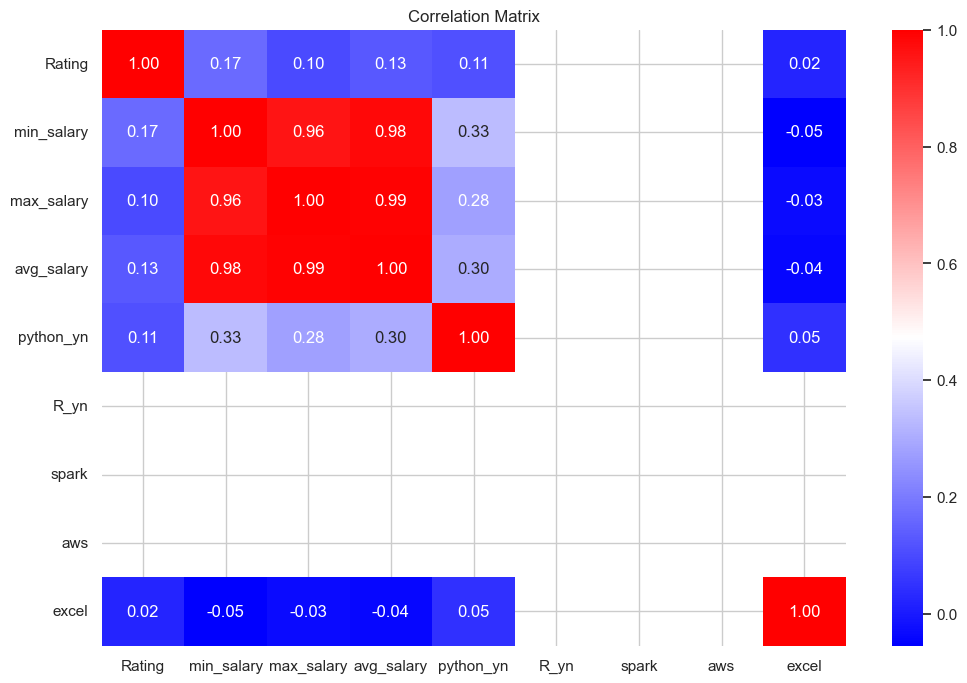

In [151]:
correlation_matrix= df_salary_new.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix,

=> The correlation between max_salary and avg_salary remains the highest one (0.99)

=> There is no relation between R_yn and spark , spark and aws as the correlation between them is 0.

## Boxplot

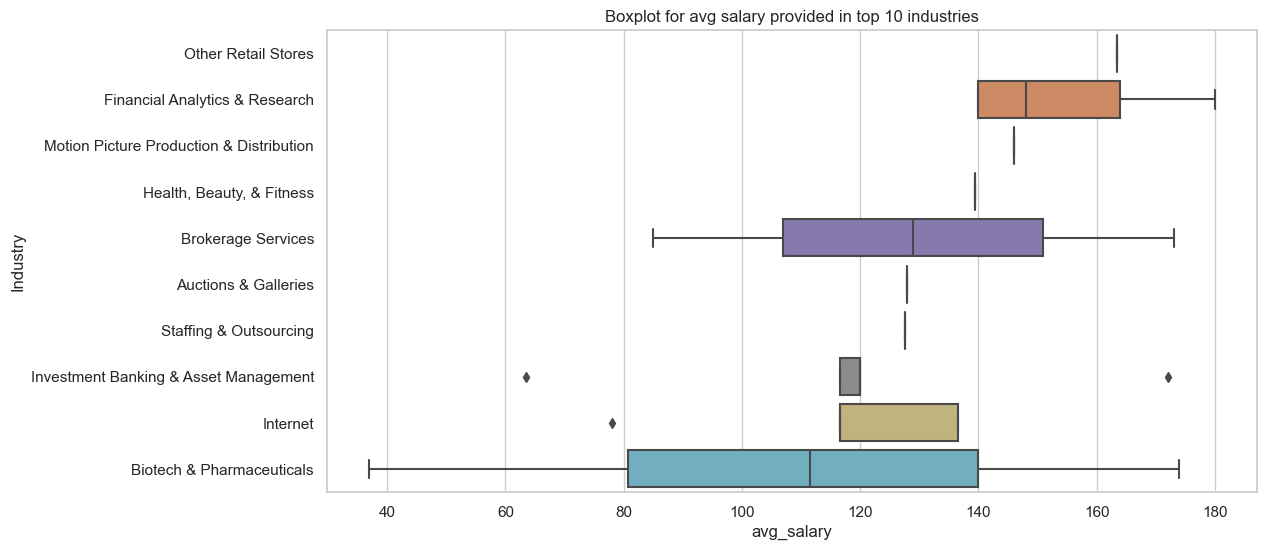

In [152]:
top_industries = df_salary_new.groupby('Industry')['avg_salary'].mean().sort_values(ascending=False).head(10).index
df_top_industries = df_salary_new[df_salary_new['Industry'].isin(top_industries)]

plt.figure(figsize= (12,6))
sns.boxplot(x= 'avg_salary', y='Industry', data=df_top_industries, order=top_industries)
plt.title("Boxplot for avg salary provided in top 10 industries")
plt.show()

From this Boxplot,

Top 10 industries for Data Scientist interms of salaries

  1. Other retail stores
  2. Financial Analytics and research
  3. Motion Picture Production & Distribution
  4. Health, Beauty & Fitness
  5. Brokerage services
  6. Auctions and Galleries
  7. Staffing and outsourcing
  8. Investment Banking & Asset management
  9. Internet
  10. Biotech and pharmaceuticals
  
=> Brokerage services, Auctions and Galleries, Staffing and outsourcing have nearly same median.

=> Financial Analytics and research, Motion Picture Production & Distribution have nearly same median.

=> Biotech and pharmaceuticals have highest range of variance.



## Scatterplot

Text(0, 0.5, 'Average Salary')

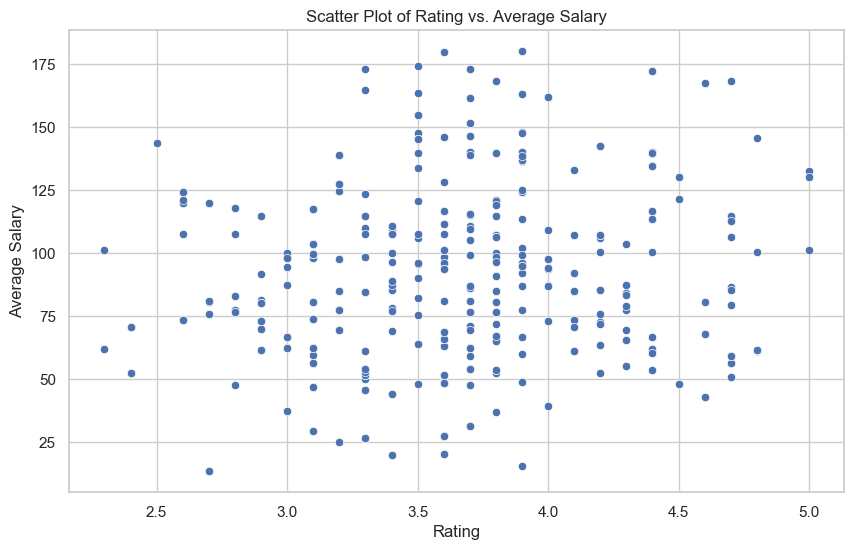

In [153]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='avg_salary', data=df_salary_new)
plt.title('Scatter Plot of Rating vs. Average Salary')
plt.xlabel('Rating')
plt.ylabel('Average Salary')

From this scatterplot,

=> Highest salary provided by the companies in the rating from 3.6 to 4.0

=> It also shows that most of the companies are under the rating of 3.5 to 4.0

## Countplot

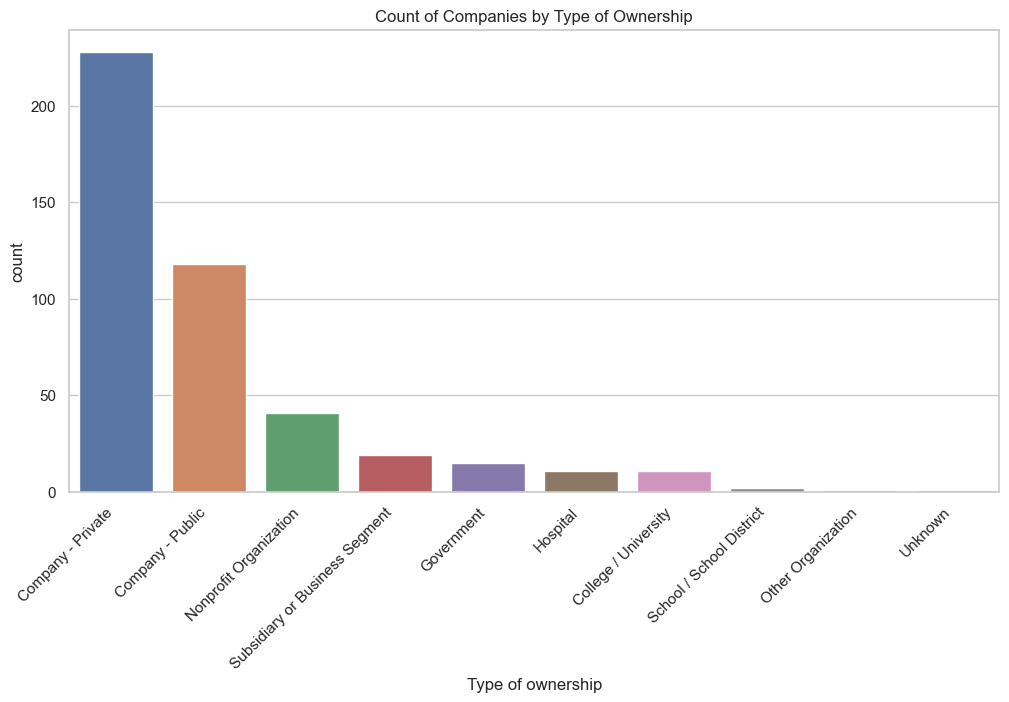

In [154]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Type of ownership', data=df_salary_new, order=df_salary_new['Type of ownership'].value_counts().index)
plt.title('Count of Companies by Type of Ownership')
plt.xticks(rotation=45, ha='right')
plt.show()

From this countplot,

=> More than 200 positions were offered by the private companies.

=> Around 100 to 150 positions were offered by public companies.

=> Around 50 positions were offered by nonprofit organizations.

=> Around 25 positions expected to be offered by Subsidiary or business segment.

=> Atleast 15-20 positions were offered by the Government.

=> Hospitals, college/university have same number of job positions.



## Histogram


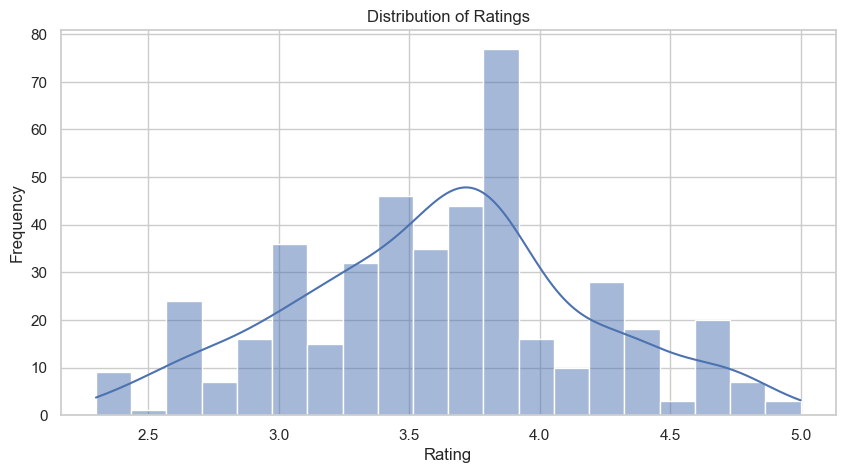

In [155]:
plt.figure(figsize=(10, 5))
sns.histplot(df_salary_new['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

From this Histogram,

=> Most of the companies have rating of 3.9 

=> Only around 5 companies expected to have highest rating of 5.0


## LABEL ENCODING

Conversion of categorical into numerical variables.

In [156]:
df_salary_new.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Size', 'Type of ownership', 'Industry', 'Revenue',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [157]:

from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Job Title', 'Size', 'Type of ownership', 'Revenue', 'job_state',
                        'Salary Estimate', 'Job Description', 'Company Name','Industry']

label_encoder = LabelEncoder()

for column in categorical_columns:
    column_name = column.strip()
    df_salary_new[column_name + '_encoded'] = label_encoder.fit_transform(df_salary_new[column_name].astype(str))

df_salary_new = df_salary_new.drop(categorical_columns, axis=1)

In [158]:
df_salary_new.columns

Index(['Rating', 'min_salary', 'max_salary', 'avg_salary', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'Job Title_encoded', 'Size_encoded',
       'Type of ownership_encoded', 'Revenue_encoded', 'job_state_encoded',
       'Salary Estimate_encoded', 'Job Description_encoded',
       'Company Name_encoded', 'Industry_encoded'],
      dtype='object')

## Features and Target

In [159]:
y = df_salary_new['avg_salary']
X = df_salary_new[['max_salary','min_salary','Job Title_encoded']]

## Train and Test 

In [160]:
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size= 0.3, random_state=42)

In [161]:
print("Shape of X train:", X_train.shape)
print("Shape of X test:", X_test.shape)
print("Shape of Y test:", y_test.shape)
print("Shape of Y train:", y_train.shape)

Shape of X train: (312,)
Shape of X test: (135,)
Shape of Y test: (135, 3)
Shape of Y train: (312, 3)


As we can see the mismatch in dimensionality of X and y, we are reshaping the X values

In [162]:
X_train_array = X_train.values.reshape(-1,1)
X_test_array = X_test.values.reshape(-1,1)

## MODEL BUILDING

## Linear Regression

In [163]:
model = LinearRegression()
model.fit(X_train_array, y_train)
y_pred_lr = model.predict(X_test_array)
y_actual = y_test
error = y_actual - y_pred_lr
absolute_error = abs(error)
mean_absolute_error = absolute_error.mean()

print("The error value is:\n", error)
print("\n Absolute error is\n" , absolute_error)
print("\n Mean absolute error is:\n", mean_absolute_error)


mse = round(mean_squared_error(y_test, y_pred_lr),2)
print("Mean Squared error:", mse)
print(f"Accuracy of model = {round(r2_score(y_test, y_pred_lr),4)*100}%")


The error value is:
      max_salary  min_salary  Job Title_encoded
470    6.440935   -6.440935         -25.353212
625    0.322321   -0.322321         -35.378375
189    2.339827   -2.339827         -42.869929
646   -2.073892    2.073892          69.268642
115   -2.086039    2.086039         -79.979202
..          ...         ...                ...
208   -2.937772    2.937772          58.802251
48     6.458441   -6.458441          74.155234
11    -2.677679    2.677679         -35.378375
671   -0.417587    0.417587         -22.559001
177   -3.228949    3.228949          10.499947

[135 rows x 3 columns]

 Absolute error is
      max_salary  min_salary  Job Title_encoded
470    6.440935    6.440935          25.353212
625    0.322321    0.322321          35.378375
189    2.339827    2.339827          42.869929
646    2.073892    2.073892          69.268642
115    2.086039    2.086039          79.979202
..          ...         ...                ...
208    2.937772    2.937772          58.8

## Decision Tree Regression

In [164]:

decision_tree_model = DecisionTreeRegressor(max_depth=5) 
decision_tree_model.fit(X_train_array, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_array)
print(f'Decision Tree Regression MSE: {mean_squared_error(y_test, decision_tree_predictions)}')
print(f"Accuracy of model = {round(r2_score(y_test, decision_tree_predictions),4)*100}%")


Decision Tree Regression MSE: 764.7106043167869
Accuracy of model = 67.75%


## Random Forest Regression

In [165]:

random_forest_model = RandomForestRegressor(n_estimators=100) 
random_forest_model.fit(X_train_array, y_train)
random_forest_predictions = random_forest_model.predict(X_test_array)
print(f'Random Forest Regression MSE: {mean_squared_error(y_test, random_forest_predictions)}')

print(f"Accuracy of model = {round(r2_score(y_test, random_forest_predictions),4)*100}%")

Random Forest Regression MSE: 714.8254578939595
Accuracy of model = 70.28999999999999%


## Gradiant Boosting Regression

In [166]:
X_train_np = X_train.to_numpy().reshape(-1, 1)
X_test_np = X_test.to_numpy().reshape(-1, 1)
y_train_np = y_train.to_numpy()


gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
multi_output_model = MultiOutputRegressor(gradient_boosting_model)
multi_output_model.fit(X_train_np, y_train_np)
gradient_boosting_predictions = multi_output_model.predict(X_test_np)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)


print(f'Gradient Boosting Regression MSE: {gradient_boosting_mse}')
print(f"Accuracy of model = {round(r2_score(y_test, gradient_boosting_predictions),4)*100}%")

Gradient Boosting Regression MSE: 668.3832333296408
Accuracy of model = 72.17%


## Conclusion:
=>  Gradient Boosting performed well among others. And we’ve built a salary prediction 
model based on average salary with the help of job title, minimum salary and average 
salary. As this is just a predictive model, we can’t expect full accuracy